In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# sub class from modelling_bert "RobertaForSequenceClassification" and override the forward method
# device = torch.device("cpu")

In [50]:
import json

def load_data(file_name):
    data = {
            "id": [],
            "label": [],
            "prob": [],
            "all_prob": []
    }
    with open(file_name, "r") as file:
        for line in file:
            aux_dict = json.loads(line)

            data["id"] += [aux_dict["id"]]
            data["label"] += [aux_dict["result"]["label"]]
            data["prob"] += [aux_dict["result"]["prob"]]
            data["all_prob"] += [aux_dict["result"]["all_prob"]]

    return data
#robert results
results_adj = load_data("results/minilm/multinli_1.0_dev_mismatched-adj-minilm.jsonl")
results_noun = load_data("results/minilm/multinli_1.0_dev_mismatched-noun-minilm.jsonl")
results_standard = load_data("results/minilm/multinli_1.0_dev_mismatched-standard-minilm.jsonl")
results_char = load_data("results/minilm/multinli_1.0_dev_mismatched-char-minilm.jsonl")
results_verb = load_data("results/minilm/multinli_1.0_dev_mismatched-verb-minilm.jsonl")
#Roberta results MultiNLI
results_greedy_suffix_roberta_mnli = load_data("results/roberta/multinli_1.0_dev_mismatched-greedy_suffix_tokenization-roberta.jsonl")
results_greedy_prefix_roberta_mnli = load_data("results/roberta/multinli_1.0_dev_mismatched-greedy_prefix_tokenization-roberta.jsonl")
results_greedy_longest_roberta_mnli = load_data("results/roberta/multinli_1.0_dev_mismatched-greedy_longest_tokenization-roberta.jsonl")
results_length_unigram_roberta_mnli = load_data("results/roberta/multinli_1.0_dev_mismatched-unigram_tokenizer-roberta.jsonl")
results_length_bigram_roberta_mnli = load_data("results/roberta/multinli_1.0_dev_mismatched-bigram_tokenizer-roberta.jsonl")

#Roberta results SNLI
results_greedy_suffix_roberta_snli = load_data("results/roberta/snli_1.0_test-greedy_suffix_tokenization-roberta.jsonl")
results_greedy_prefix_roberta_snli = load_data("results/roberta/snli_1.0_test-greedy_prefix_tokenization-roberta.jsonl")
results_greedy_longest_roberta_snli = load_data("results/roberta/snli_1.0_test-greedy_longest_tokenization-roberta.jsonl")
results_length_unigram_roberta_snli = load_data("results/roberta/snli_1.0_test-unigram_tokenizer-roberta.jsonl")
results_length_bigram_roberta_snli = load_data("results/roberta/snli_1.0_test-bigram_tokenizer-roberta.jsonl")

#minilm results MultiNLi
results_greedy_suffix_minilm_mnli = load_data("results/minilm/multinli_1.0_dev_mismatched-greedy_suffix_tokenization-minilm.jsonl")
results_greedy_prefix_minilm_mnli = load_data("results/minilm/multinli_1.0_dev_mismatched-greedy_prefix_tokenization-minilm.jsonl")
results_greedy_longest_minilm_mnli = load_data("results/minilm/multinli_1.0_dev_mismatched-greedy_longest_tokenization-minilm.jsonl")
results_length_unigram_minilm_mnli = load_data("results/minilm/multinli_1.0_dev_mismatched-unigram_tokenizer-minilm.jsonl")
results_length_bigram_minilm_mnli = load_data("results/minilm/multinli_1.0_dev_mismatched-bigram_tokenizer-minilm.jsonl")

#minilm results SNLI
results_greedy_suffix_minilm_snli = load_data("results/minilm/snli_1.0_test-greedy_suffix_tokenization-minilm.jsonl")
results_greedy_prefix_minilm_snli = load_data("results/minilm/snli_1.0_test-greedy_prefix_tokenization-minilm.jsonl")
results_greedy_longest_minilm_snli = load_data("results/minilm/snli_1.0_test-greedy_longest_tokenization-minilm.jsonl")
results_length_unigram_minilm_snli = load_data("results/minilm/snli_1.0_test-unigram_tokenizer-minilm.jsonl")
results_length_bigram_minilm_snli = load_data("results/minilm/snli_1.0_test-bigram_tokenizer-minilm.jsonl")


In [51]:
import json
import pandas as pd

# data_path = "snli_1.0_test.jsonl"
data_path = "multinli_1.0_dev_mismatched.jsonl"

data = []
limit = 500_000
with open(data_path, "r") as file:
    for _ in range(limit):
        json_obj = file.readline()
        if json_obj != "":
            data += [json.loads(json_obj)]
        else:
            break

data_df = {
    "label": [],
    "sent1": [],
    "sent2": []
}

for datum in data:
    data_df["label"] += [datum["gold_label"]]
    data_df["sent1"] += [datum["sentence1"]] # premise
    data_df["sent2"] += [datum["sentence2"]] # hypothesis

data_df = pd.DataFrame(data_df)
print(data_df.shape)
data_df.head()

gt_labels=data_df["label"].to_numpy()
gt_labels_num = data_df["label"].value_counts().to_dict()

gt_labels_num = dict(sorted(gt_labels_num.items(), key=lambda x:x[0]))

gt_labels_num

(10000, 3)


{'-': 168, 'contradiction': 3240, 'entailment': 3463, 'neutral': 3129}

In [52]:
from collections import defaultdict
import numpy as np

# def get_labels_number(res_dict):
#     labels_model_custom = defaultdict(int)
#     for label in res_dict["label"]:
#         labels_model_custom[label] += 1
#     labels_model_custom = dict(sorted(labels_model_custom.items(), key=lambda x:x[0]))
#     print(labels_model_custom)
#     return labels_model_custom



def get_labels_number(res_dict):
    labels_model_custom = defaultdict(int)
    # Make sure we're using the actual labels, not other dictionary keys
    for label in res_dict["label"]:
        if label in ['-', 'contradiction', 'entailment', 'neutral']:  # Only count valid NLI labels
            labels_model_custom[label] += 1
    labels_model_custom = dict(sorted(labels_model_custom.items(), key=lambda x:x[0]))
    print(labels_model_custom)
    return labels_model_custom



results_adj_num = get_labels_number(results_adj)
results_noun_num = get_labels_number(results_noun)
results_standard_num = get_labels_number(results_standard)
results_char_num = get_labels_number(results_char)
results_verb_num = get_labels_number(results_verb)


results_standard_labels = np.asarray(results_standard["label"])
results_adj_labels = np.asarray(results_adj["label"])
results_noun_labels = np.asarray(results_noun["label"])
results_char_labels = np.asarray(results_char["label"])
results_verb_labels = np.asarray(results_verb["label"])


{'contradiction': 2871, 'entailment': 5079, 'neutral': 2050}
{'contradiction': 2756, 'entailment': 5079, 'neutral': 2165}
{'contradiction': 3008, 'entailment': 3709, 'neutral': 3283}
{'contradiction': 567, 'entailment': 9349, 'neutral': 84}
{'contradiction': 2904, 'entailment': 5041, 'neutral': 2055}


POS Results Roberta

/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/2382159770.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/2382159770.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/2382159770.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/2382159770.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

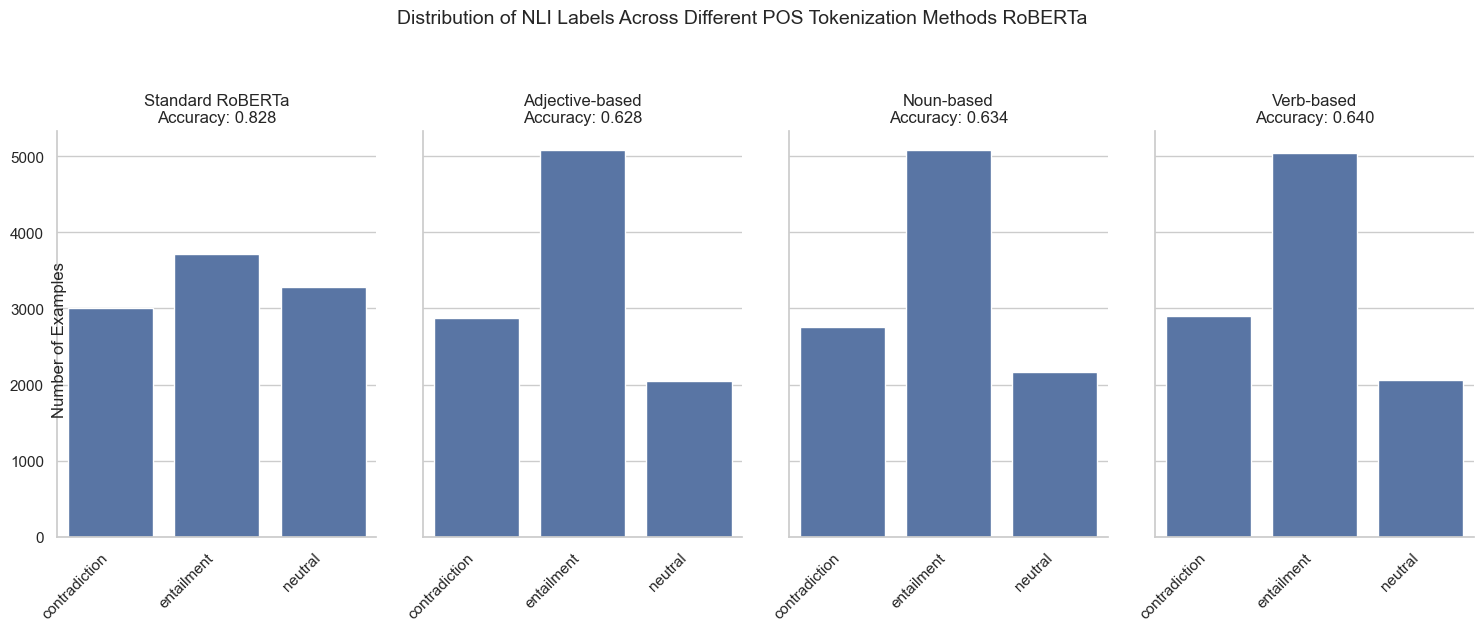

In [53]:
sns.set_theme(style="whitegrid")

def make_bar_plot(result_dict, title, ax):
    sns.barplot(result_dict, ax=ax)
    ax.set_title(title)
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Create figure with 4 subplots (removed char data)
fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True)

# Add a main title to the figure
fig.suptitle('Distribution of NLI Labels Across Different POS Tokenization Methods RoBERTa',
             fontsize=14, y=1.05)

# Add common y-label
fig.text(0.04, 0.5, 'Number of Examples',
         va='center', rotation='vertical', fontsize=12)

# Create subplots with improved titles and accuracy formatting
make_bar_plot(results_standard_num,
              f"Standard RoBERTa\nAccuracy: {sum(results_standard_labels == gt_labels)/len(gt_labels):.3f}", axes[0])
make_bar_plot(results_adj_num,
              f"Adjective-based\nAccuracy: {sum(results_adj_labels == gt_labels)/len(gt_labels):.3f}", axes[1])
make_bar_plot(results_noun_num,
              f"Noun-based\nAccuracy: {sum(results_noun_labels == gt_labels)/len(gt_labels):.3f}", axes[2])
make_bar_plot(results_verb_num,
              f"Verb-based\nAccuracy: {sum(results_verb_labels == gt_labels)/len(gt_labels):.3f}", axes[3])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Remove spines
sns.despine()

plt.show()

/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/3706478879.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/3706478879.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/3706478879.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/3706478879.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

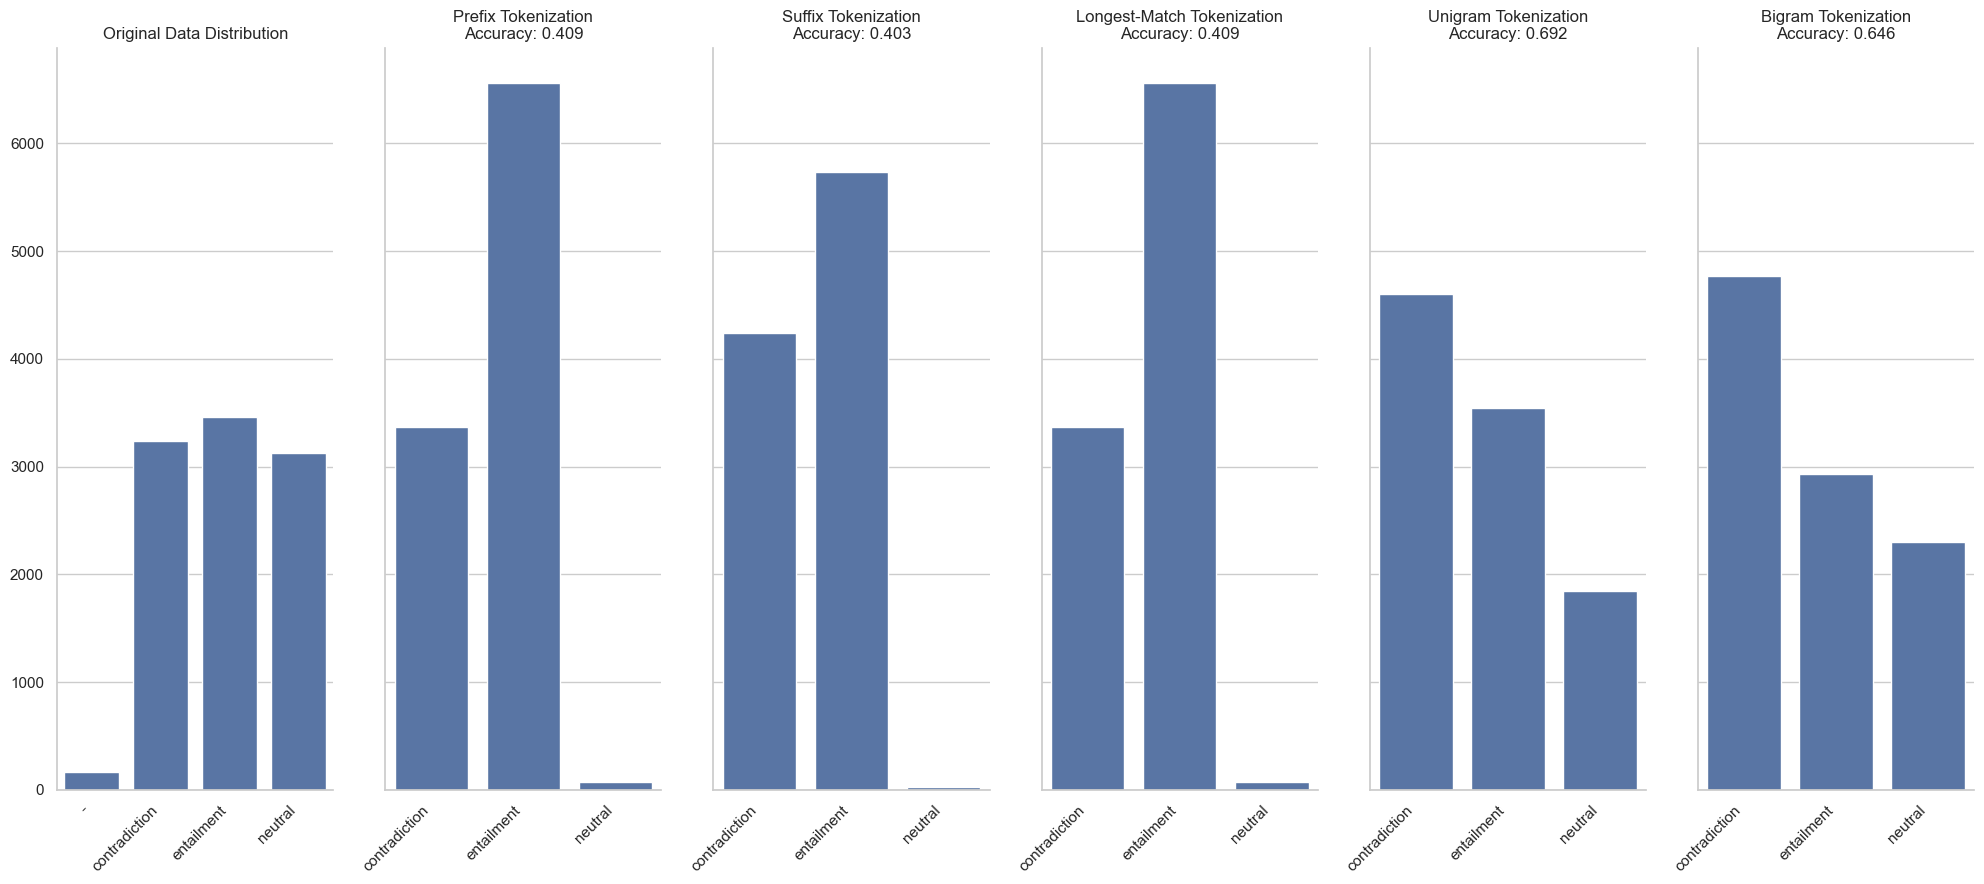

In [54]:
sns.set_theme(style="whitegrid")

def make_bar_plot(result_dict, title, ax):
    sns.barplot(result_dict, ax=ax)
    ax.set_title(title)
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Create figure and subplots
fig, axes = plt.subplots(1, 6, figsize=(20, 9), sharey=True)

# Calculate accuracies using the raw results (before get_labels_number was called)
greedy_prefix_acc = sum(np.array(results_greedy_prefix_minilm["label"]) == gt_labels)/len(gt_labels)
greedy_suffix_acc = sum(np.array(results_greedy_suffix_minilm["label"]) == gt_labels)/len(gt_labels)
greedy_longest_acc = sum(np.array(results_greedy_longest_minilm["label"]) == gt_labels)/len(gt_labels)
unigram_acc = sum(np.array(results_length_unigram_minilm["label"]) == gt_labels)/len(gt_labels)
bigram_acc = sum(np.array(results_length_bigram_minilm["label"]) == gt_labels)/len(gt_labels)

# Create subplots with accuracies in titles
make_bar_plot(gt_labels_num,
              "Original Data Distribution", axes[0])
make_bar_plot(results_greedy_prefix_minilm_num,
              f"Prefix Tokenization\nAccuracy: {greedy_prefix_acc:.3f}", axes[1])
make_bar_plot(results_greedy_suffix_minilm_num,
              f"Suffix Tokenization\nAccuracy: {greedy_suffix_acc:.3f}", axes[2])
make_bar_plot(results_greedy_longest_minilm_num,
              f"Longest-Match Tokenization\nAccuracy: {greedy_longest_acc:.3f}", axes[3])
make_bar_plot(results_length_unigram_minilm_num,
              f"Unigram Tokenization\nAccuracy: {unigram_acc:.3f}", axes[4])
make_bar_plot(results_length_bigram_minilm_num,
              f"Bigram Tokenization\nAccuracy: {bigram_acc:.3f}", axes[5])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Remove spines
sns.despine()

# Show plot
plt.show()

# RoBERTa results Length & Greedy MNLI

{'contradiction': 468, 'entailment': 9150, 'neutral': 382}
{'contradiction': 547, 'entailment': 9187, 'neutral': 266}
{'contradiction': 468, 'entailment': 9150, 'neutral': 382}
{'contradiction': 3905, 'entailment': 3765, 'neutral': 2330}
{'contradiction': 3648, 'entailment': 3532, 'neutral': 2820}


/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/1762914281.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/1762914281.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/1762914281.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/1762914281.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

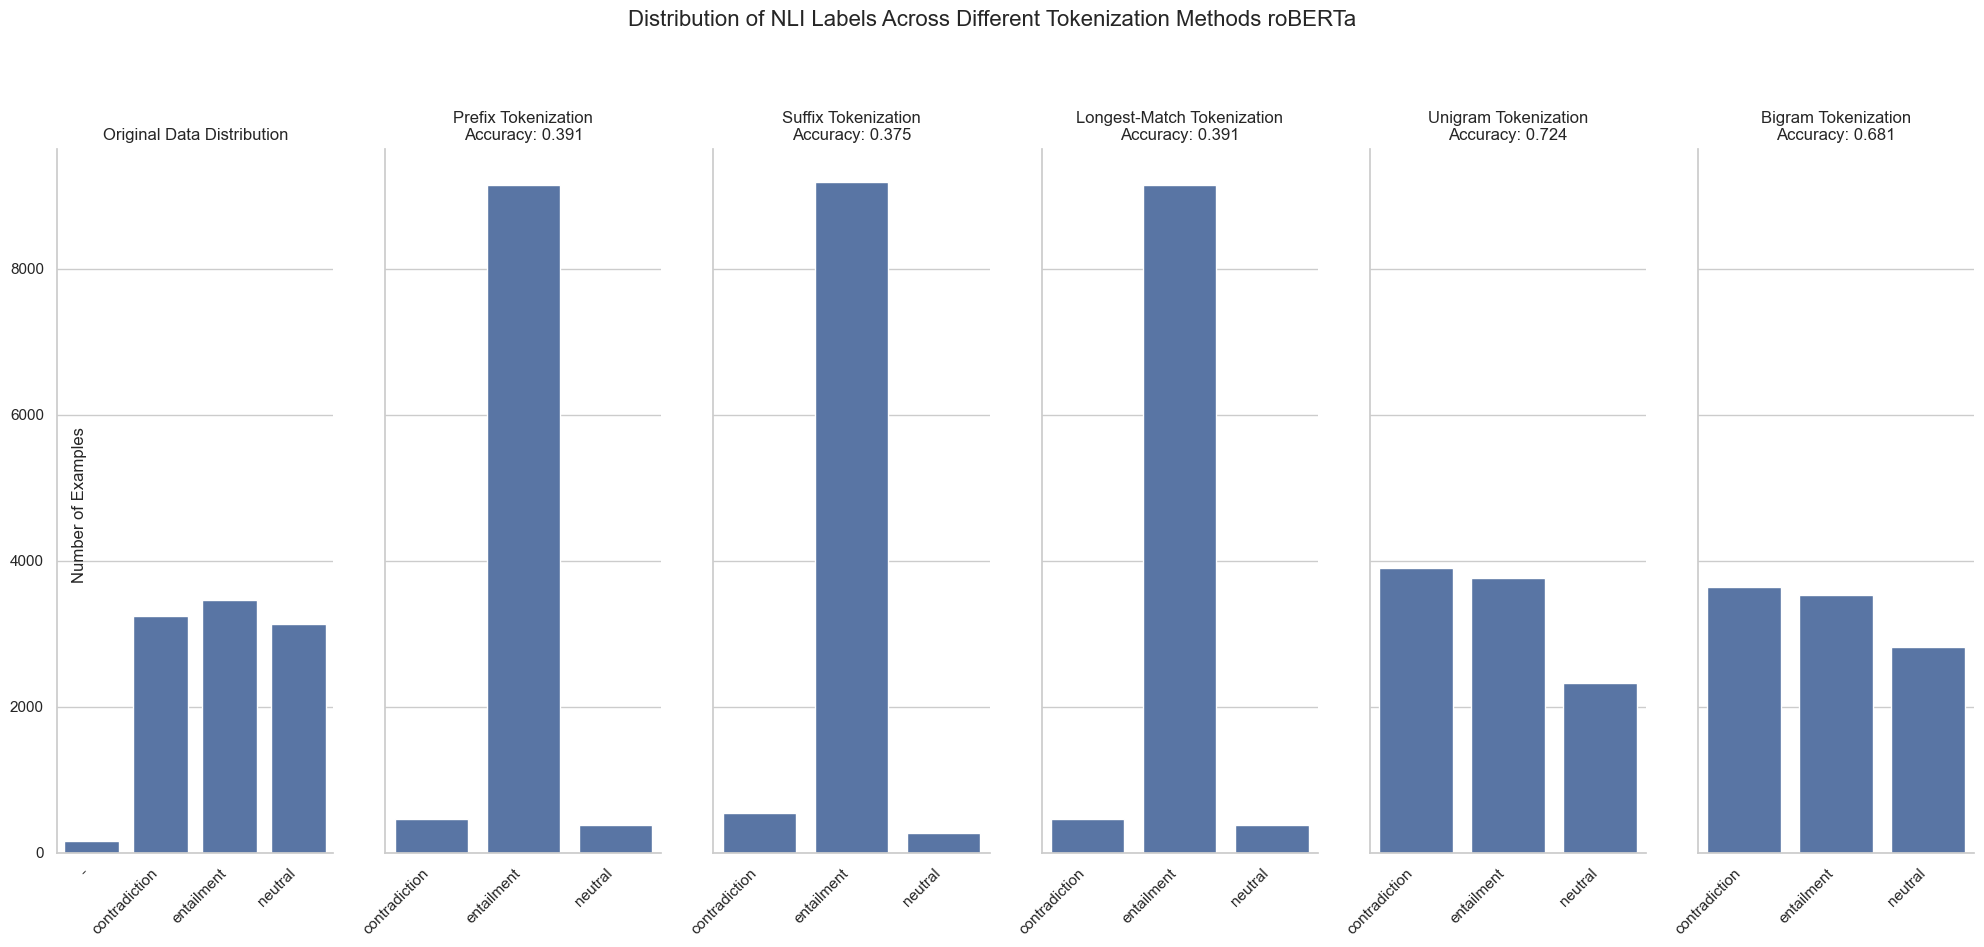

In [55]:

# Then get label counts
results_greedy_prefix_roberta_mnli_num = get_labels_number(results_greedy_prefix_roberta_mnli)
results_greedy_suffix_roberta_mnli_num = get_labels_number(results_greedy_suffix_roberta_mnli)
results_greedy_longest_roberta_mnli_num = get_labels_number(results_greedy_longest_roberta_mnli)
results_length_unigram_roberta_mnli_num = get_labels_number(results_length_unigram_roberta_mnli)
results_length_bigram_roberta_mnli_num = get_labels_number(results_length_bigram_roberta_mnli)

# Calculate accuracies first
greedy_prefix_acc = sum(np.array(results_greedy_prefix_roberta_mnli["label"]) == gt_labels)/len(gt_labels)
greedy_suffix_acc = sum(np.array(results_greedy_suffix_roberta_mnli["label"]) == gt_labels)/len(gt_labels)
greedy_longest_acc = sum(np.array(results_greedy_longest_roberta_mnli["label"]) == gt_labels)/len(gt_labels)
unigram_acc = sum(np.array(results_length_unigram_roberta_mnli["label"]) == gt_labels)/len(gt_labels)
bigram_acc = sum(np.array(results_length_bigram_roberta_mnli["label"]) == gt_labels)/len(gt_labels)


sns.set_theme(style="whitegrid")

def make_bar_plot(result_dict, title, ax):
    sns.barplot(result_dict, ax=ax)
    ax.set_title(title)
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Create figure and subplots
fig, axes = plt.subplots(1, 6, figsize=(20, 9), sharey=True)

# Add a main title to the entire figure
fig.suptitle('Distribution of NLI Labels Across Different Tokenization Methods roBERTa',
             fontsize=16, y=1.05)

# Add common y-label
fig.text(0.04, 0.5, 'Number of Examples',
         va='center', rotation='vertical', fontsize=12)
# Create the plots with the correct accuracies
make_bar_plot(gt_labels_num,
              "Original Data Distribution", axes[0])
make_bar_plot(results_greedy_prefix_roberta_mnli_num,
              f"Prefix Tokenization\nAccuracy: {greedy_prefix_acc:.3f}", axes[1])
make_bar_plot(results_greedy_suffix_roberta_mnli_num,
              f"Suffix Tokenization\nAccuracy: {greedy_suffix_acc:.3f}", axes[2])
make_bar_plot(results_greedy_longest_roberta_mnli_num,
              f"Longest-Match Tokenization\nAccuracy: {greedy_longest_acc:.3f}", axes[3])
make_bar_plot(results_length_unigram_roberta_mnli_num,
              f"Unigram Tokenization\nAccuracy: {unigram_acc:.3f}", axes[4])
make_bar_plot(results_length_bigram_roberta_mnli_num,
              f"Bigram Tokenization\nAccuracy: {bigram_acc:.3f}", axes[5])
# Adjust layout to prevent overlapping
plt.tight_layout()

# Remove spines
sns.despine()

# Show plot
plt.show()


# RoBERTa results Length & Greedy SNLI

In [56]:
results_greedy_prefix_snli_num = get_labels_number(results_greedy_prefix_roberta_snli)
results_greedy_suffix_snli_num = get_labels_number(results_greedy_suffix_roberta_snli)
results_greedy_longest_snli_num = get_labels_number(results_greedy_longest_roberta_snli)
results_length_unigram_snli_num = get_labels_number(results_length_unigram_roberta_snli)
results_length_bigram_snli_num = get_labels_number(results_length_bigram_roberta_snli)

{'contradiction': 397, 'entailment': 9423, 'neutral': 180}
{'contradiction': 475, 'entailment': 9387, 'neutral': 138}
{'contradiction': 397, 'entailment': 9423, 'neutral': 180}
{'contradiction': 3637, 'entailment': 4011, 'neutral': 2352}
{'contradiction': 4004, 'entailment': 3320, 'neutral': 2676}


{'contradiction': 397, 'entailment': 9423, 'neutral': 180}
{'contradiction': 475, 'entailment': 9387, 'neutral': 138}
{'contradiction': 397, 'entailment': 9423, 'neutral': 180}
{'contradiction': 3637, 'entailment': 4011, 'neutral': 2352}
{'contradiction': 4004, 'entailment': 3320, 'neutral': 2676}


/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/3845030269.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/3845030269.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/3845030269.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/3845030269.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

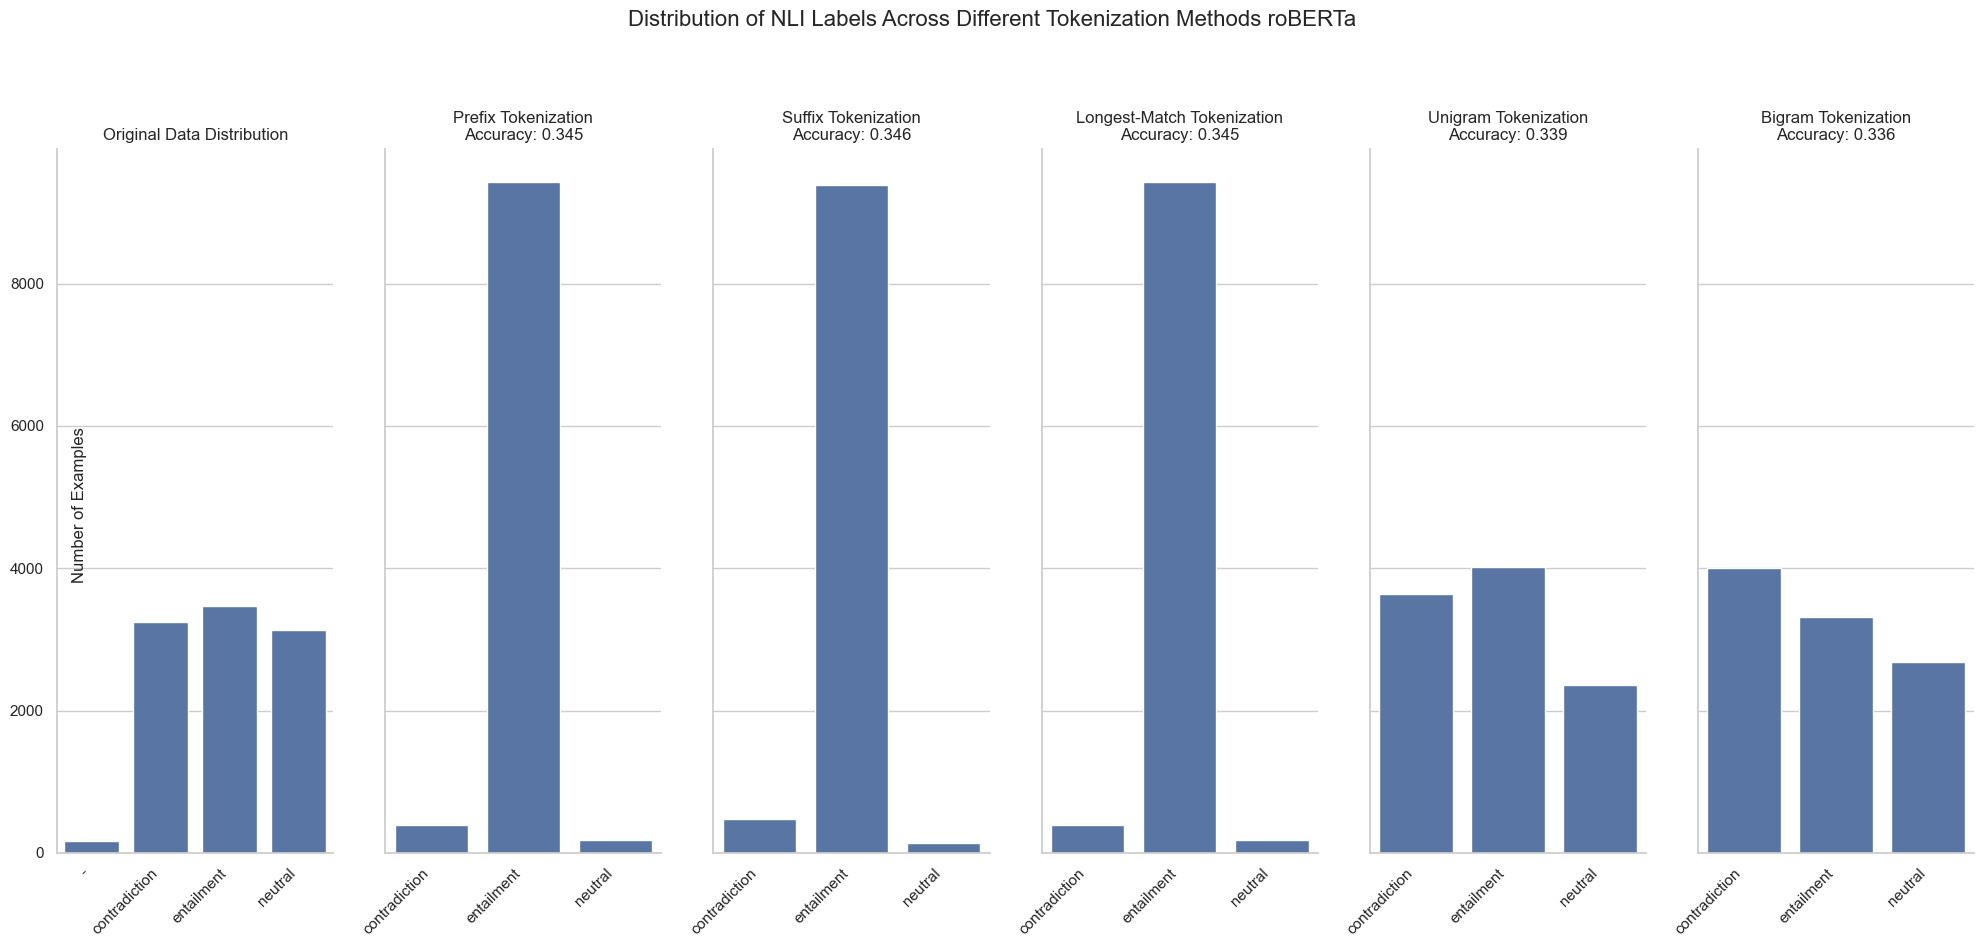

In [57]:
# Get label counts for RoBERTa SNLI results
results_greedy_prefix_snli_num = get_labels_number(results_greedy_prefix_roberta_snli)
results_greedy_suffix_snli_num = get_labels_number(results_greedy_suffix_roberta_snli)
results_greedy_longest_snli_num = get_labels_number(results_greedy_longest_roberta_snli)
results_length_unigram_snli_num = get_labels_number(results_length_unigram_roberta_snli)
results_length_bigram_snli_num = get_labels_number(results_length_bigram_roberta_snli)

# Calculate accuracies using the correct SNLI results
greedy_prefix_acc = sum(np.array(results_greedy_prefix_roberta_snli["label"]) == gt_labels)/len(gt_labels)
greedy_suffix_acc = sum(np.array(results_greedy_suffix_roberta_snli["label"]) == gt_labels)/len(gt_labels)
greedy_longest_acc = sum(np.array(results_greedy_longest_roberta_snli["label"]) == gt_labels)/len(gt_labels)
unigram_acc = sum(np.array(results_length_unigram_roberta_snli["label"]) == gt_labels)/len(gt_labels)
bigram_acc = sum(np.array(results_length_bigram_roberta_snli["label"]) == gt_labels)/len(gt_labels)
sns.set_theme(style="whitegrid")

def make_bar_plot(result_dict, title, ax):
    sns.barplot(result_dict, ax=ax)
    ax.set_title(title)
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Create figure and subplots
fig, axes = plt.subplots(1, 6, figsize=(20, 9), sharey=True)

# Add a main title to the entire figure
fig.suptitle('Distribution of NLI Labels Across Different Tokenization Methods roBERTa',
             fontsize=16, y=1.05)

# Add common y-label
fig.text(0.04, 0.5, 'Number of Examples',
         va='center', rotation='vertical', fontsize=12)

# Create subplots with correct accuracies
make_bar_plot(gt_labels_num,
              "Original Data Distribution", axes[0])
make_bar_plot(results_greedy_prefix_snli_num,
              f"Prefix Tokenization\nAccuracy: {greedy_prefix_acc:.3f}", axes[1])
make_bar_plot(results_greedy_suffix_snli_num,
              f"Suffix Tokenization\nAccuracy: {greedy_suffix_acc:.3f}", axes[2])
make_bar_plot(results_greedy_longest_snli_num,
              f"Longest-Match Tokenization\nAccuracy: {greedy_longest_acc:.3f}", axes[3])
make_bar_plot(results_length_unigram_snli_num,
              f"Unigram Tokenization\nAccuracy: {unigram_acc:.3f}", axes[4])
make_bar_plot(results_length_bigram_snli_num,
              f"Bigram Tokenization\nAccuracy: {bigram_acc:.3f}", axes[5])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Remove spines
sns.despine()

# Show plot
plt.show()

# MiniLM results Length & Greedy MNLI

In [58]:
# First, process all the data to get the label counts
results_greedy_prefix_num = get_labels_number(results_greedy_prefix_minilm_mnli)
results_greedy_suffix_num = get_labels_number(results_greedy_suffix_minilm_mnli)
results_greedy_longest_num = get_labels_number(results_greedy_longest_minilm_mnli)
results_length_unigram_num = get_labels_number(results_length_unigram_minilm_mnli)
results_length_bigram_num = get_labels_number(results_length_bigram_minilm_mnli)

{'contradiction': 3368, 'entailment': 6560, 'neutral': 72}
{'contradiction': 4238, 'entailment': 5739, 'neutral': 23}
{'contradiction': 3368, 'entailment': 6560, 'neutral': 72}
{'contradiction': 4605, 'entailment': 3547, 'neutral': 1848}
{'contradiction': 4767, 'entailment': 2936, 'neutral': 2297}


/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/2980999237.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/2980999237.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/2980999237.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/2980999237.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

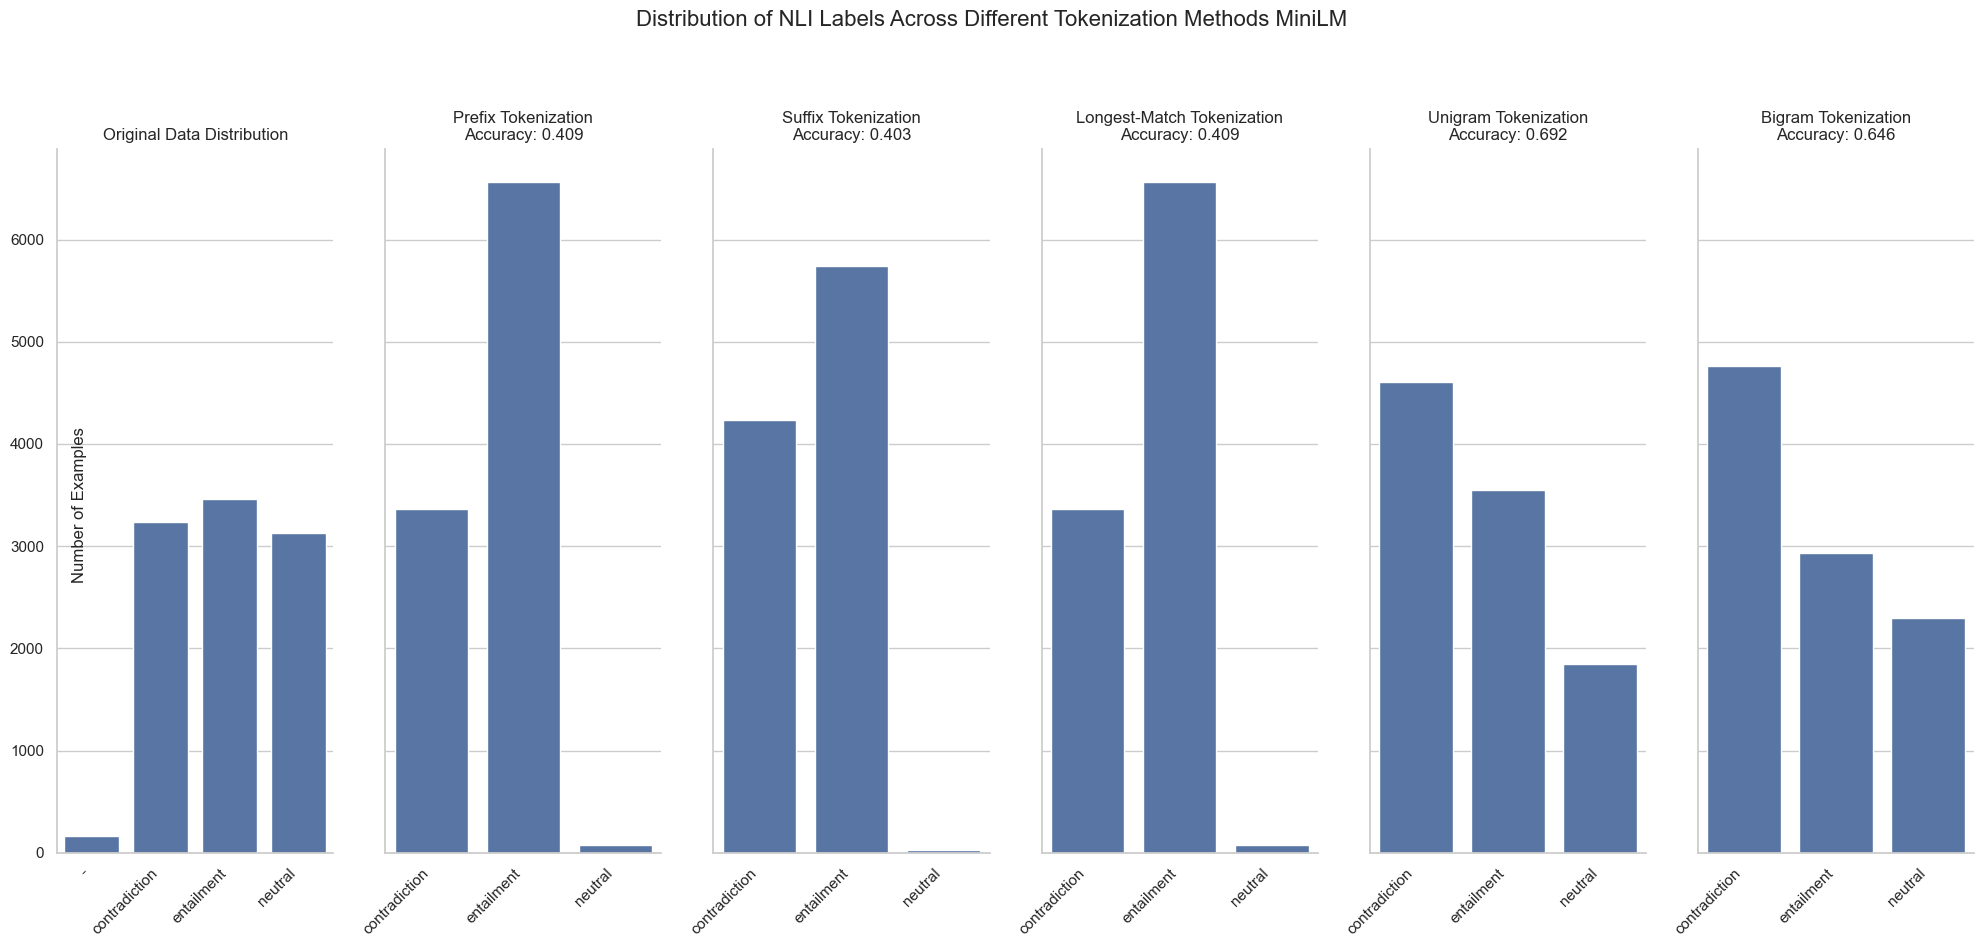

In [59]:
sns.set_theme(style="whitegrid")

def make_bar_plot(result_dict, title, ax):
    sns.barplot(result_dict, ax=ax)
    ax.set_title(title)
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Calculate accuracies using the correct variables
greedy_prefix_acc = sum(np.array(results_greedy_prefix_minilm_mnli["label"]) == gt_labels)/len(gt_labels)
greedy_suffix_acc = sum(np.array(results_greedy_suffix_minilm_mnli["label"]) == gt_labels)/len(gt_labels)
greedy_longest_acc = sum(np.array(results_greedy_longest_minilm_mnli["label"]) == gt_labels)/len(gt_labels)
unigram_acc = sum(np.array(results_length_unigram_minilm_mnli["label"]) == gt_labels)/len(gt_labels)
bigram_acc = sum(np.array(results_length_bigram_minilm_mnli["label"]) == gt_labels)/len(gt_labels)

# Create figure and subplots
fig, axes = plt.subplots(1, 6, figsize=(20, 9), sharey=True)

# Add a main title to the entire figure
fig.suptitle('Distribution of NLI Labels Across Different Tokenization Methods MiniLM',
             fontsize=16, y=1.05)

# Add common y-label
fig.text(0.04, 0.5, 'Number of Examples',
         va='center', rotation='vertical', fontsize=12)

# Create subplots with correct accuracies
make_bar_plot(gt_labels_num,
              "Original Data Distribution", axes[0])
make_bar_plot(results_greedy_prefix_minilm_num,
              f"Prefix Tokenization\nAccuracy: {greedy_prefix_acc:.3f}", axes[1])
make_bar_plot(results_greedy_suffix_minilm_num,
              f"Suffix Tokenization\nAccuracy: {greedy_suffix_acc:.3f}", axes[2])
make_bar_plot(results_greedy_longest_minilm_num,
              f"Longest-Match Tokenization\nAccuracy: {greedy_longest_acc:.3f}", axes[3])
make_bar_plot(results_length_unigram_minilm_num,
              f"Unigram Tokenization\nAccuracy: {unigram_acc:.3f}", axes[4])
make_bar_plot(results_length_bigram_minilm_num,
              f"Bigram Tokenization\nAccuracy: {bigram_acc:.3f}", axes[5])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Remove spines
sns.despine()

# Show plot
plt.show()

# Minilm results Length & Greedy SNLI

In [60]:
#Results to Num
results_greedy_prefix_minilm_snli_num = get_labels_number(results_greedy_prefix_minilm_snli)
results_greedy_suffix_minilm_snli_num = get_labels_number(results_greedy_suffix_minilm_snli)
results_greedy_longest_minilm_snli_num = get_labels_number(results_greedy_longest_minilm_snli)
results_length_unigram_minilm_snli_num = get_labels_number(results_length_unigram_minilm_snli)
results_length_bigram_minilm_snli_num = get_labels_number(results_length_bigram_minilm_snli)

{'contradiction': 4712, 'entailment': 5280, 'neutral': 8}
{'contradiction': 5699, 'entailment': 4298, 'neutral': 3}
{'contradiction': 4712, 'entailment': 5280, 'neutral': 8}
{'contradiction': 4654, 'entailment': 3641, 'neutral': 1705}
{'contradiction': 5346, 'entailment': 2891, 'neutral': 1763}


/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/505202284.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/505202284.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/505202284.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/jm/6cz8ktjn2wx9jl44jrdh13840000gn/T/ipykernel_20009/505202284.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

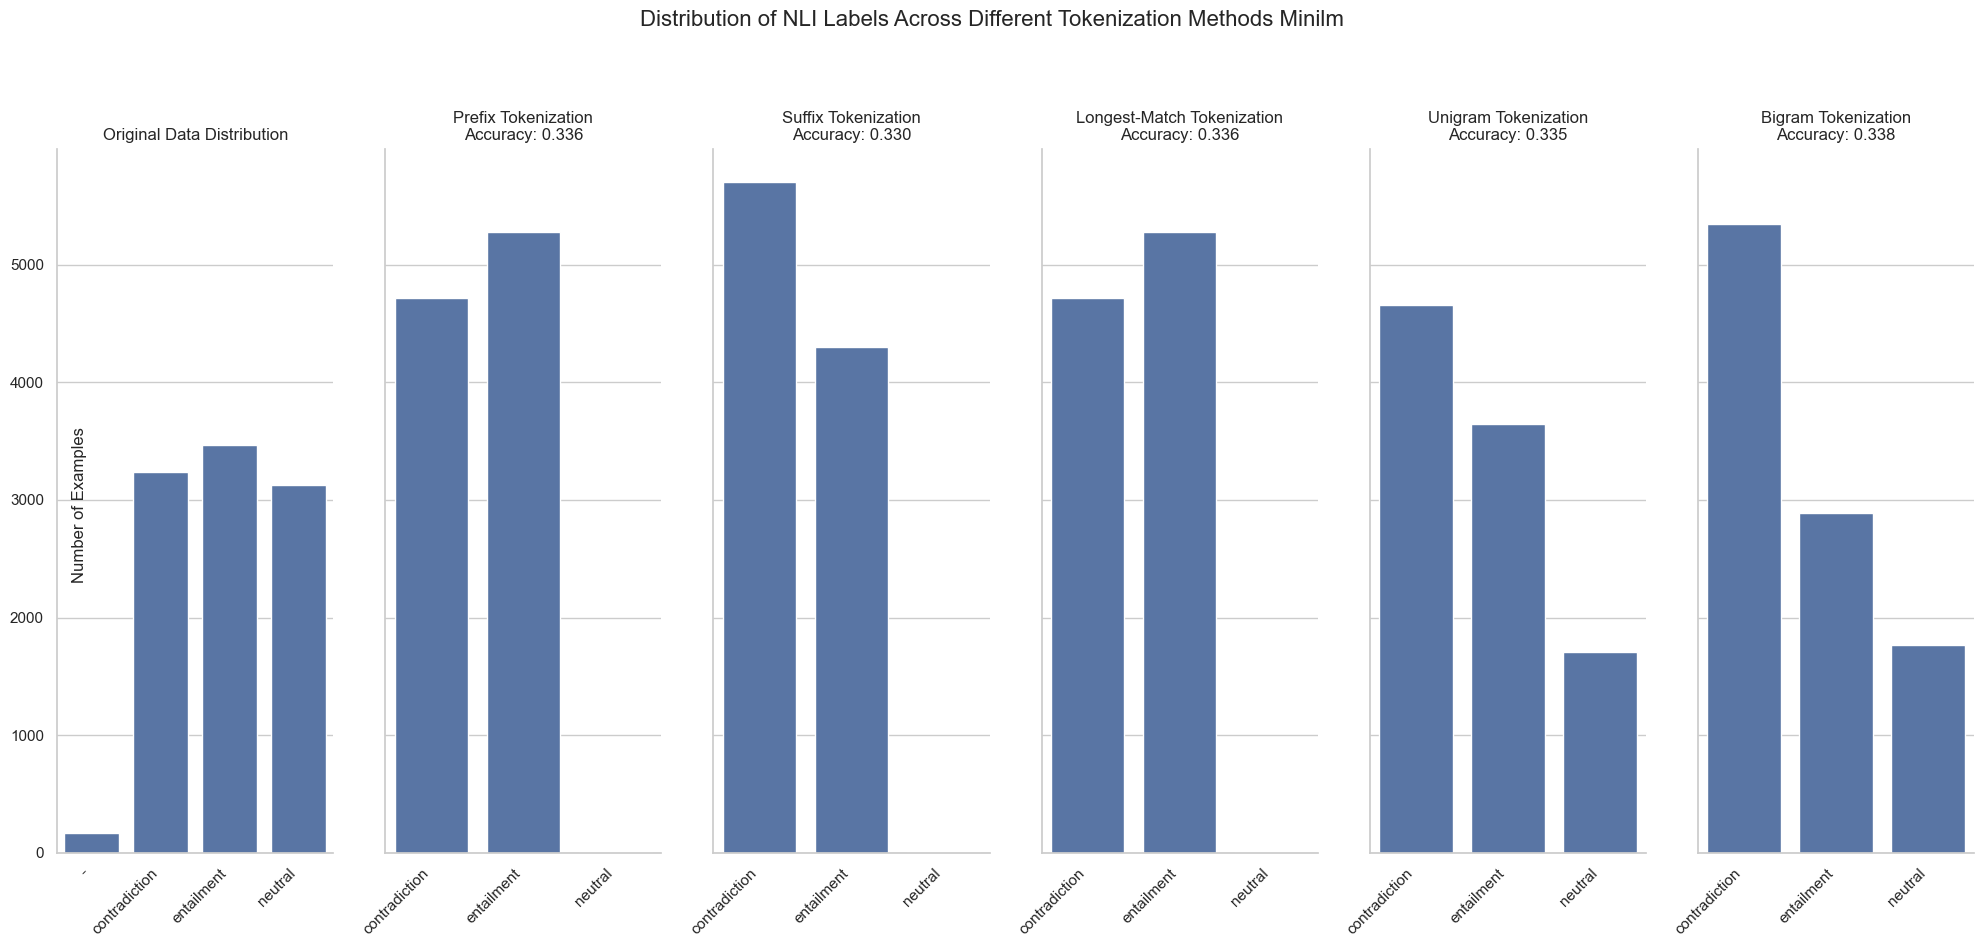

In [61]:
# Calculate accuracies using the correct SNLI results
greedy_prefix_acc = sum(np.array(results_greedy_prefix_minilm_snli["label"]) == gt_labels)/len(gt_labels)
greedy_suffix_acc = sum(np.array(results_greedy_suffix_minilm_snli["label"]) == gt_labels)/len(gt_labels)
greedy_longest_acc = sum(np.array(results_greedy_longest_minilm_snli["label"]) == gt_labels)/len(gt_labels)
unigram_acc = sum(np.array(results_length_unigram_minilm_snli["label"]) == gt_labels)/len(gt_labels)
bigram_acc = sum(np.array(results_length_bigram_minilm_snli["label"]) == gt_labels)/len(gt_labels)


sns.set_theme(style="whitegrid")

def make_bar_plot(result_dict, title, ax):
    sns.barplot(result_dict, ax=ax)
    ax.set_title(title)
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Create figure and subplots
fig, axes = plt.subplots(1, 6, figsize=(20, 9), sharey=True)

# Add a main title to the entire figure
fig.suptitle('Distribution of NLI Labels Across Different Tokenization Methods Minilm',
             fontsize=16, y=1.05)

# Add common y-label
fig.text(0.04, 0.5, 'Number of Examples',
         va='center', rotation='vertical', fontsize=12)

# Create subplots with correct accuracies
make_bar_plot(gt_labels_num,
              "Original Data Distribution", axes[0])
make_bar_plot(results_greedy_prefix_minilm_snli_num,
              f"Prefix Tokenization\nAccuracy: {greedy_prefix_acc:.3f}", axes[1])
make_bar_plot(results_greedy_suffix_minilm_snli_num,
              f"Suffix Tokenization\nAccuracy: {greedy_suffix_acc:.3f}", axes[2])
make_bar_plot(results_greedy_longest_minilm_snli_num,
              f"Longest-Match Tokenization\nAccuracy: {greedy_longest_acc:.3f}", axes[3])
make_bar_plot(results_length_unigram_minilm_snli_num,
              f"Unigram Tokenization\nAccuracy: {unigram_acc:.3f}", axes[4])
make_bar_plot(results_length_bigram_minilm_snli_num,
              f"Bigram Tokenization\nAccuracy: {bigram_acc:.3f}", axes[5])
# Adjust layout to prevent overlapping
plt.tight_layout()

# Remove spines
sns.despine()

# Show plot
plt.show()